In [1]:
import networkx as nx
import osmnx as ox
ox.settings.use_cache = True
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import geopandas as gpd
%matplotlib inline
ox.__version__

C:\Users\think\anaconda3\envs\ox\lib\site-packages\pyproj\__init__.py:91: UserWarning: Valid PROJ data directory not found. Either set the path using the environmental variable PROJ_LIB or with `pyproj.datadir.set_data_dir`.
  warnings.warn(str(err))
C:\Users\think\anaconda3\envs\ox\lib\site-packages\geopandas\_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


'1.1.2'

# 准备数据

In [2]:
transit = pd.read_json('./SHANGHAI/orginalData/地面公交.json')
metro = pd.read_json('./SHANGHAI/orginalData/地铁.json')

In [3]:
transit.head()

,line_name,polyline,total_price,station_names,station_coords
0,01路(上海西站--蓝村路南泉路),"121.403475,31.262046;121.403385,31.262023;121....",2.0,"[上海西站, 曹杨路芝川路, 曹杨路铜川路, 铜川路曹杨路, 武宁新村, 曹杨路谈家渡路, ...","[121.403475,31.262046, 121.404154,31.26056, 12..."
1,01路(蓝村路南泉路--上海西站),"121.523928,31.211879;121.524674,31.211849;121....",2.0,"[蓝村路南泉路, 浦建路东方路, 浦东南路宁阳路, 浦东南路浦电路, 浦东南路商城路, 世纪...","[121.523928,31.211879, 121.523911,31.208092, 1..."
2,04路(汶水路共和新路--汶水路共和新路),"121.447141,31.293056;121.446416,31.292936;121....",2.0,"[汶水路共和新路, 汶水路万荣路, 江场三路汶水路, 江场三路江场西路, 江场西路万荣路, ...","[121.447141,31.293056, 121.442413,31.291337, 1..."
3,04路调头车(汶水路共和新路--汶水路共和新路),"121.447132,31.293057;121.446643,31.292975;121....",2.0,"[汶水路共和新路, 汶水路万荣路, 江场三路汶水路, 江场三路江场西路, 江场西路万荣路, ...","[121.447132,31.293057, 121.442496,31.291454, 1..."
4,6路(长白路图们路--武进路河南北路),"121.545391,31.289379;121.54661,31.289909;121.5...",2.0,"[长白路图们路, 图们路控江路, 控江路敦化路, 控江路隆昌路, 控江路双阳路, 控江路黄兴...","[121.545391,31.289379, 121.548405,31.29017, 12..."


In [4]:
metro.head(1)

,line_name,polyline,total_price,station_names,station_coords
0,地铁1号线(莘庄--富锦路),"121.385373,31.111152;121.38586,31.11171;121.38...",6,"[莘庄, 外环路, 莲花路, 锦江乐园, 上海南站, 漕宝路, 上海体育馆, 徐家汇, 衡山...","[121.385373,31.111152, 121.39302,31.120899, 12..."


In [5]:
transit['label'] = '地面公交'
metro['label'] = '轨道交通'

In [6]:
pt = pd.concat([transit,metro])

In [7]:
pt

,line_name,polyline,total_price,station_names,station_coords,label
0,01路(上海西站--蓝村路南泉路),"121.403475,31.262046;121.403385,31.262023;121....",2.0,"[上海西站, 曹杨路芝川路, 曹杨路铜川路, 铜川路曹杨路, 武宁新村, 曹杨路谈家渡路, ...","[121.403475,31.262046, 121.404154,31.26056, 12...",地面公交
1,01路(蓝村路南泉路--上海西站),"121.523928,31.211879;121.524674,31.211849;121....",2.0,"[蓝村路南泉路, 浦建路东方路, 浦东南路宁阳路, 浦东南路浦电路, 浦东南路商城路, 世纪...","[121.523928,31.211879, 121.523911,31.208092, 1...",地面公交
2,04路(汶水路共和新路--汶水路共和新路),"121.447141,31.293056;121.446416,31.292936;121....",2.0,"[汶水路共和新路, 汶水路万荣路, 江场三路汶水路, 江场三路江场西路, 江场西路万荣路, ...","[121.447141,31.293056, 121.442413,31.291337, 1...",地面公交
3,04路调头车(汶水路共和新路--汶水路共和新路),"121.447132,31.293057;121.446643,31.292975;121....",2.0,"[汶水路共和新路, 汶水路万荣路, 江场三路汶水路, 江场三路江场西路, 江场西路万荣路, ...","[121.447132,31.293057, 121.442496,31.291454, 1...",地面公交
4,6路(长白路图们路--武进路河南北路),"121.545391,31.289379;121.54661,31.289909;121.5...",2.0,"[长白路图们路, 图们路控江路, 控江路敦化路, 控江路隆昌路, 控江路双阳路, 控江路黄兴...","[121.545391,31.289379, 121.548405,31.29017, 12...",地面公交
...,...,...,...,...,...,...
45,磁悬浮(龙阳路--浦东国际机场),"121.557855,31.20248;121.55902,31.202399;121.56...",50.0,"[龙阳路, 浦东国际机场]","[121.557855,31.20248, 121.805591,31.150958]",轨道交通
46,金山铁路(上海南站--金山卫站),"121.428653,31.152165;121.426979,31.151267;121....",10.0,"[上海南站, 春申站, 新桥站, 车墩站, 叶榭站, 亭林站, 金山园区站, 金山卫站]","[121.428653,31.152165, 121.35462,31.07909, 121...",轨道交通
47,金山铁路(金山卫站--上海南站),"121.362014,30.728076;121.367414,30.731047;121....",10.0,"[金山卫站, 金山园区站, 亭林站, 叶榭站, 车墩站, 新桥站, 春申站, 上海南站]","[121.362014,30.728076, 121.36845,30.829912, 12...",轨道交通
48,轨道交通浦江线(沈杜公路--汇臻路),"121.512468,31.061012;121.512501,31.060476;121....",4.0,"[沈杜公路, 三鲁公路, 闵瑞路, 浦航路, 东城一路, 汇臻路]","[121.512468,31.061012, 121.527389,31.056108, 1...",轨道交通


# 坐标系转换

In [8]:
# 特别注意：坐标系为高德火星坐标系

In [9]:
from ChangeCoordinate import ChangeCoord  # 这个包大家放到site-packages中

In [10]:
import sys
sys.path

['D:\\S001小灶课\\2022.06.15-OSMnx',
 'C:\\Users\\think\\anaconda3\\envs\\ox\\python310.zip',
 'C:\\Users\\think\\anaconda3\\envs\\ox\\DLLs',
 'C:\\Users\\think\\anaconda3\\envs\\ox\\lib',
 'C:\\Users\\think\\anaconda3\\envs\\ox',
 '',
 'C:\\Users\\think\\anaconda3\\envs\\ox\\lib\\site-packages',
 'C:\\Users\\think\\anaconda3\\envs\\ox\\lib\\site-packages\\win32',
 'C:\\Users\\think\\anaconda3\\envs\\ox\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\think\\anaconda3\\envs\\ox\\lib\\site-packages\\Pythonwin']

In [11]:
transit['polyline'][0]

'121.403475,31.262046;121.403385,31.262023;121.403355,31.262001;121.403294,31.261997;121.402565,31.262105;121.402591,31.261819;121.402826,31.261823;121.403155,31.261793;121.403442,31.261719;121.403555,31.26168;121.403728,31.261567;121.403945,31.261172;121.403997,31.261033;121.404154,31.26056;121.404219,31.260365;121.404319,31.260226;121.404444,31.259883;121.404622,31.259306;121.404714,31.259019;121.40474,31.258941;121.404948,31.258242;121.405295,31.257135;121.405477,31.256536;121.405586,31.256202;121.405612,31.256102;121.40579,31.255538;121.405881,31.255247;121.406007,31.254835;121.406102,31.254518;121.406259,31.253989;121.406354,31.253694;121.406645,31.252726;121.406862,31.251984;121.407205,31.250833;121.407296,31.250812;121.40918,31.251267;121.409696,31.251398;121.411046,31.251727;121.411146,31.249492;121.411207,31.248112;121.411324,31.245794;121.41151,31.245677;121.411862,31.245621;121.412726,31.245464;121.413116,31.24536;121.413181,31.245339;121.413854,31.245113;121.413928,31.24508

In [12]:
lines = transit['polyline'][0].split(';')

In [13]:
lines

['121.403475,31.262046',
 '121.403385,31.262023',
 '121.403355,31.262001',
 '121.403294,31.261997',
 '121.402565,31.262105',
 '121.402591,31.261819',
 '121.402826,31.261823',
 '121.403155,31.261793',
 '121.403442,31.261719',
 '121.403555,31.26168',
 '121.403728,31.261567',
 '121.403945,31.261172',
 '121.403997,31.261033',
 '121.404154,31.26056',
 '121.404219,31.260365',
 '121.404319,31.260226',
 '121.404444,31.259883',
 '121.404622,31.259306',
 '121.404714,31.259019',
 '121.40474,31.258941',
 '121.404948,31.258242',
 '121.405295,31.257135',
 '121.405477,31.256536',
 '121.405586,31.256202',
 '121.405612,31.256102',
 '121.40579,31.255538',
 '121.405881,31.255247',
 '121.406007,31.254835',
 '121.406102,31.254518',
 '121.406259,31.253989',
 '121.406354,31.253694',
 '121.406645,31.252726',
 '121.406862,31.251984',
 '121.407205,31.250833',
 '121.407296,31.250812',
 '121.40918,31.251267',
 '121.409696,31.251398',
 '121.411046,31.251727',
 '121.411146,31.249492',
 '121.411207,31.248112',
 '121

In [14]:
lines = [(float(i.split(',')[0]),float(i.split(',')[1])) for i in lines]

In [15]:
lines

[(121.403475, 31.262046),
 (121.403385, 31.262023),
 (121.403355, 31.262001),
 (121.403294, 31.261997),
 (121.402565, 31.262105),
 (121.402591, 31.261819),
 (121.402826, 31.261823),
 (121.403155, 31.261793),
 (121.403442, 31.261719),
 (121.403555, 31.26168),
 (121.403728, 31.261567),
 (121.403945, 31.261172),
 (121.403997, 31.261033),
 (121.404154, 31.26056),
 (121.404219, 31.260365),
 (121.404319, 31.260226),
 (121.404444, 31.259883),
 (121.404622, 31.259306),
 (121.404714, 31.259019),
 (121.40474, 31.258941),
 (121.404948, 31.258242),
 (121.405295, 31.257135),
 (121.405477, 31.256536),
 (121.405586, 31.256202),
 (121.405612, 31.256102),
 (121.40579, 31.255538),
 (121.405881, 31.255247),
 (121.406007, 31.254835),
 (121.406102, 31.254518),
 (121.406259, 31.253989),
 (121.406354, 31.253694),
 (121.406645, 31.252726),
 (121.406862, 31.251984),
 (121.407205, 31.250833),
 (121.407296, 31.250812),
 (121.40918, 31.251267),
 (121.409696, 31.251398),
 (121.411046, 31.251727),
 (121.411146, 31.

In [16]:
ccg = ChangeCoord()

In [17]:
# ccg.gcj02_to_wgs84()

In [18]:
lines[0]

(121.403475, 31.262046)

In [19]:
ccg.gcj02_to_wgs84(lines[0][0],lines[0][1]) 

[121.3988208531572, 31.26386703821692]

In [20]:
[ccg.gcj02_to_wgs84(coord[0],coord[1]) for coord in lines]

[[121.3988208531572, 31.26386703821692],
 [121.39873084869936, 31.26384404400395],
 [121.3987008485588, 31.263822052204997],
 [121.39863984486236, 31.263818051404748],
 [121.39791080213008, 31.263925987216222],
 [121.39793682780704, 31.263640111014848],
 [121.39817183548239, 31.263644112651907],
 [121.39850085417844, 31.263614134414308],
 [121.3987878792825, 31.26354017797077],
 [121.39890089120995, 31.263501200383217],
 [121.39907391541763, 31.263388258836862],
 [121.39929097010635, 31.262993443639335],
 [121.39934298744899, 31.26285450745644],
 [121.39950004532523, 31.262381724090037],
 [121.39956506959268, 31.26218681380368],
 [121.39966509330647, 31.262047882409032],
 [121.39979013846029, 31.26170504227781],
 [121.39996821190567, 31.261128309821522],
 [121.4000602495386, 31.260841443898425],
 [121.40008625998323, 31.260763480519902],
 [121.40029435136525, 31.26006480746356],
 [121.40064150371765, 31.258958332403868],
 [121.40082358776334, 31.258359618390138],
 [121.4009326367741, 3

In [21]:
def convert(x):
    lines = x.split(';')
    lines = [(float(i.split(',')[0]),float(i.split(',')[1])) for i in lines]
    coords = [ccg.gcj02_to_wgs84(coord[0],coord[1]) for coord in lines]
    return coords

In [22]:
pt['polyline'] = pt['polyline'].apply(convert)

In [23]:
pt.head(1)

,line_name,polyline,total_price,station_names,station_coords,label
0,01路(上海西站--蓝村路南泉路),"[[121.3988208531572, 31.26386703821692], [121....",2.0,"[上海西站, 曹杨路芝川路, 曹杨路铜川路, 铜川路曹杨路, 武宁新村, 曹杨路谈家渡路, ...","[121.403475,31.262046, 121.404154,31.26056, 12...",地面公交


In [24]:
pt['polyline'][0]

0    [[121.3988208531572, 31.26386703821692], [121....
0    [[121.38073892818241, 31.113054077432178], [12...
Name: polyline, dtype: object

In [25]:
pt['station_coords'][0]

0    [121.403475,31.262046, 121.404154,31.26056, 12...
0    [121.385373,31.111152, 121.39302,31.120899, 12...
Name: station_coords, dtype: object

In [26]:
def convert_2(x):
    lines = [(float(i.split(',')[0]),float(i.split(',')[1])) for i in x]
    coords = [ccg.gcj02_to_wgs84(coord[0],coord[1]) for coord in lines]
    return coords

In [27]:
pt['station_coords'] = pt['station_coords'].apply(convert_2)

In [28]:
pt['station_coords'][0] # 121.3988208531572, 31.26386703821692

0    [[121.3988208531572, 31.26386703821692], [121....
0    [[121.38073892818241, 31.113054077432178], [12...
Name: station_coords, dtype: object

In [29]:
pt.head()

,line_name,polyline,total_price,station_names,station_coords,label
0,01路(上海西站--蓝村路南泉路),"[[121.3988208531572, 31.26386703821692], [121....",2.0,"[上海西站, 曹杨路芝川路, 曹杨路铜川路, 铜川路曹杨路, 武宁新村, 曹杨路谈家渡路, ...","[[121.3988208531572, 31.26386703821692], [121....",地面公交
1,01路(蓝村路南泉路--上海西站),"[[121.51958292346053, 31.213976645080137], [12...",2.0,"[蓝村路南泉路, 浦建路东方路, 浦东南路宁阳路, 浦东南路浦电路, 浦东南路商城路, 世纪...","[[121.51958292346053, 31.213976645080137], [12...",地面公交
2,04路(汶水路共和新路--汶水路共和新路),"[[121.44253744849894, 31.294908412586928], [12...",2.0,"[汶水路共和新路, 汶水路万荣路, 江场三路汶水路, 江场三路江场西路, 江场西路万荣路, ...","[[121.44253744849894, 31.294908412586928], [12...",地面公交
3,04路调头车(汶水路共和新路--汶水路共和新路),"[[121.44252842762191, 31.29490939480904], [121...",2.0,"[汶水路共和新路, 汶水路万荣路, 江场三路汶水路, 江场三路江场西路, 江场西路万荣路, ...","[[121.44252842762191, 31.29490939480904], [121...",地面公交
4,6路(长白路图们路--武进路河南北路),"[[121.54110537610666, 31.291496209940505], [12...",2.0,"[长白路图们路, 图们路控江路, 控江路敦化路, 控江路隆昌路, 控江路双阳路, 控江路黄兴...","[[121.54110537610666, 31.291496209940505], [12...",地面公交


# 转成OSMnx结构

![image-2.png](img/下载.png)

## 获取站点之间的轨迹

In [31]:
pt.head()

,line_name,polyline,total_price,station_names,station_coords,label
0,01路(上海西站--蓝村路南泉路),"[[121.3988208531572, 31.26386703821692], [121....",2.0,"[上海西站, 曹杨路芝川路, 曹杨路铜川路, 铜川路曹杨路, 武宁新村, 曹杨路谈家渡路, ...","[[121.3988208531572, 31.26386703821692], [121....",地面公交
1,01路(蓝村路南泉路--上海西站),"[[121.51958292346053, 31.213976645080137], [12...",2.0,"[蓝村路南泉路, 浦建路东方路, 浦东南路宁阳路, 浦东南路浦电路, 浦东南路商城路, 世纪...","[[121.51958292346053, 31.213976645080137], [12...",地面公交
2,04路(汶水路共和新路--汶水路共和新路),"[[121.44253744849894, 31.294908412586928], [12...",2.0,"[汶水路共和新路, 汶水路万荣路, 江场三路汶水路, 江场三路江场西路, 江场西路万荣路, ...","[[121.44253744849894, 31.294908412586928], [12...",地面公交
3,04路调头车(汶水路共和新路--汶水路共和新路),"[[121.44252842762191, 31.29490939480904], [121...",2.0,"[汶水路共和新路, 汶水路万荣路, 江场三路汶水路, 江场三路江场西路, 江场西路万荣路, ...","[[121.44252842762191, 31.29490939480904], [121...",地面公交
4,6路(长白路图们路--武进路河南北路),"[[121.54110537610666, 31.291496209940505], [12...",2.0,"[长白路图们路, 图们路控江路, 控江路敦化路, 控江路隆昌路, 控江路双阳路, 控江路黄兴...","[[121.54110537610666, 31.291496209940505], [12...",地面公交


In [32]:
len(pt['polyline'].iloc[0,])

437

In [33]:
pt['polyline'].iloc[0,].index(pt['station_coords'].iloc[0,][0]) # 起点对应的编号

0

In [34]:
pt['polyline'].iloc[0,].index(pt['station_coords'].iloc[0,][1]) # 第二个点对应的编号

13

In [35]:
def get(x):  # 这里x是什么？注意，是一个df
    len_staions = len(x['station_coords'])
    
    id_lst = []  # 存储找到的id
    for i in range(len_staions):
        get_id = x['polyline'].index(x['station_coords'][i])
        id_lst.append(get_id)
#     print(id_lst)
    
    station_zipped = list(zip(id_lst[:-1],id_lst[1:]))
    
#     print(station_zipped)
    sub_lines_coords = [x['polyline'][i[0]:i[1]+1] for i in station_zipped]  # 切片，注意一点要加1
    return sub_lines_coords

In [36]:
pt.head(1).apply(get,axis=1)

0    [[[121.3988208531572, 31.26386703821692], [121...
dtype: object

In [37]:
pt['sub_polyline'] = pt.apply(get,axis=1)

In [38]:
pt.head(1)

,line_name,polyline,total_price,station_names,station_coords,label,sub_polyline
0,01路(上海西站--蓝村路南泉路),"[[121.3988208531572, 31.26386703821692], [121....",2.0,"[上海西站, 曹杨路芝川路, 曹杨路铜川路, 铜川路曹杨路, 武宁新村, 曹杨路谈家渡路, ...","[[121.3988208531572, 31.26386703821692], [121....",地面公交,"[[[121.3988208531572, 31.26386703821692], [121..."


In [39]:
len(pt['station_names'].iloc[0,])

18

In [40]:
len(pt['sub_polyline'].iloc[0,])

17

## 先处理nodes，即公交站点

In [41]:
pt.head(1)

,line_name,polyline,total_price,station_names,station_coords,label,sub_polyline
0,01路(上海西站--蓝村路南泉路),"[[121.3988208531572, 31.26386703821692], [121....",2.0,"[上海西站, 曹杨路芝川路, 曹杨路铜川路, 铜川路曹杨路, 武宁新村, 曹杨路谈家渡路, ...","[[121.3988208531572, 31.26386703821692], [121....",地面公交,"[[[121.3988208531572, 31.26386703821692], [121..."


In [42]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.repeat.html?highlight=repeat#pandas.Series.repeat

In [43]:
len(pt)

2463

In [44]:
pt['station_names'].explode()

0       上海西站
0     曹杨路芝川路
0     曹杨路铜川路
0     铜川路曹杨路
0       武宁新村
       ...  
49      东城一路
49       浦航路
49       闵瑞路
49      三鲁公路
49      沈杜公路
Name: station_names, Length: 53647, dtype: object

In [45]:
pt['station_names'].explode().reset_index()

,index,station_names
0,0,上海西站
1,0,曹杨路芝川路
2,0,曹杨路铜川路
3,0,铜川路曹杨路
4,0,武宁新村
...,...,...
53642,49,东城一路
53643,49,浦航路
53644,49,闵瑞路
53645,49,三鲁公路


In [46]:
pt['line_name'].repeat([len(i) for i in pt['station_names']])

0      01路(上海西站--蓝村路南泉路)
0      01路(上海西站--蓝村路南泉路)
0      01路(上海西站--蓝村路南泉路)
0      01路(上海西站--蓝村路南泉路)
0      01路(上海西站--蓝村路南泉路)
             ...        
49    轨道交通浦江线(汇臻路--沈杜公路)
49    轨道交通浦江线(汇臻路--沈杜公路)
49    轨道交通浦江线(汇臻路--沈杜公路)
49    轨道交通浦江线(汇臻路--沈杜公路)
49    轨道交通浦江线(汇臻路--沈杜公路)
Name: line_name, Length: 53647, dtype: object

In [47]:
pt['station_coords'].explode().reset_index()

,index,station_coords
0,0,"[121.3988208531572, 31.26386703821692]"
1,0,"[121.39950004532523, 31.262381724090037]"
2,0,"[121.40135383866824, 31.25665944255681]"
3,0,"[121.4050442636107, 31.25322485267399]"
4,0,"[121.4173502914548, 31.24135758134636]"
...,...,...
53642,49,"[121.52778976467829, 31.03260756095104]"
53643,49,"[121.52628210978972, 31.043200473885985]"
53644,49,"[121.52601267159076, 31.05015873648527]"
53645,49,"[121.52306847453723, 31.05829820823302]"


In [48]:
result = pd.concat([
    pt['station_names'].explode().reset_index(),
    pt['station_coords'].explode().reset_index(),
    pt['line_name'].repeat([len(i) for i in pt['station_names']]).reset_index(),
    pt['label'].repeat([len(i) for i in pt['station_names']]).reset_index(),
],axis=1)

In [49]:
result.head()

,index,station_names,index,station_coords,index,line_name,index,label
0,0,上海西站,0,"[121.3988208531572, 31.26386703821692]",0,01路(上海西站--蓝村路南泉路),0,地面公交
1,0,曹杨路芝川路,0,"[121.39950004532523, 31.262381724090037]",0,01路(上海西站--蓝村路南泉路),0,地面公交
2,0,曹杨路铜川路,0,"[121.40135383866824, 31.25665944255681]",0,01路(上海西站--蓝村路南泉路),0,地面公交
3,0,铜川路曹杨路,0,"[121.4050442636107, 31.25322485267399]",0,01路(上海西站--蓝村路南泉路),0,地面公交
4,0,武宁新村,0,"[121.4173502914548, 31.24135758134636]",0,01路(上海西站--蓝村路南泉路),0,地面公交


In [50]:
result.iloc[[0,-1],:]

,index,station_names,index,station_coords,index,line_name,index,label
0,0,上海西站,0,"[121.3988208531572, 31.26386703821692]",0,01路(上海西站--蓝村路南泉路),0,地面公交
53646,49,沈杜公路,49,"[121.50809587474987, 31.063157068276993]",49,轨道交通浦江线(汇臻路--沈杜公路),49,轨道交通


In [51]:
result.columns

Index(['index', 'station_names', 'index', 'station_coords', 'index',
       'line_name', 'index', 'label'],
      dtype='object')

In [52]:
result = result[['station_names',  'station_coords', 'label',
       'line_name',]]

In [53]:
result.iloc[[0,-1],:]

,station_names,station_coords,label,line_name
0,上海西站,"[121.3988208531572, 31.26386703821692]",地面公交,01路(上海西站--蓝村路南泉路)
53646,沈杜公路,"[121.50809587474987, 31.063157068276993]",轨道交通,轨道交通浦江线(汇臻路--沈杜公路)


In [54]:
result

,station_names,station_coords,label,line_name
0,上海西站,"[121.3988208531572, 31.26386703821692]",地面公交,01路(上海西站--蓝村路南泉路)
1,曹杨路芝川路,"[121.39950004532523, 31.262381724090037]",地面公交,01路(上海西站--蓝村路南泉路)
2,曹杨路铜川路,"[121.40135383866824, 31.25665944255681]",地面公交,01路(上海西站--蓝村路南泉路)
3,铜川路曹杨路,"[121.4050442636107, 31.25322485267399]",地面公交,01路(上海西站--蓝村路南泉路)
4,武宁新村,"[121.4173502914548, 31.24135758134636]",地面公交,01路(上海西站--蓝村路南泉路)
...,...,...,...,...
53642,东城一路,"[121.52778976467829, 31.03260756095104]",轨道交通,轨道交通浦江线(汇臻路--沈杜公路)
53643,浦航路,"[121.52628210978972, 31.043200473885985]",轨道交通,轨道交通浦江线(汇臻路--沈杜公路)
53644,闵瑞路,"[121.52601267159076, 31.05015873648527]",轨道交通,轨道交通浦江线(汇臻路--沈杜公路)
53645,三鲁公路,"[121.52306847453723, 31.05829820823302]",轨道交通,轨道交通浦江线(汇臻路--沈杜公路)


In [55]:
result['x'] = result['station_coords'].str.get(0)
result['y'] = result['station_coords'].str.get(1)

In [56]:
result.head()

,station_names,station_coords,label,line_name,x,y
0,上海西站,"[121.3988208531572, 31.26386703821692]",地面公交,01路(上海西站--蓝村路南泉路),121.398821,31.263867
1,曹杨路芝川路,"[121.39950004532523, 31.262381724090037]",地面公交,01路(上海西站--蓝村路南泉路),121.399500,31.262382
2,曹杨路铜川路,"[121.40135383866824, 31.25665944255681]",地面公交,01路(上海西站--蓝村路南泉路),121.401354,31.256659
3,铜川路曹杨路,"[121.4050442636107, 31.25322485267399]",地面公交,01路(上海西站--蓝村路南泉路),121.405044,31.253225
4,武宁新村,"[121.4173502914548, 31.24135758134636]",地面公交,01路(上海西站--蓝村路南泉路),121.417350,31.241358


In [ ]:
# result.drop_duplicates(subset=['station_names','line_name','label'])

In [57]:
# result = result.drop_duplicates(subset=['station_names','line_name','label'])

In [58]:
result.head()

,station_names,station_coords,label,line_name,x,y
0,上海西站,"[121.3988208531572, 31.26386703821692]",地面公交,01路(上海西站--蓝村路南泉路),121.398821,31.263867
1,曹杨路芝川路,"[121.39950004532523, 31.262381724090037]",地面公交,01路(上海西站--蓝村路南泉路),121.399500,31.262382
2,曹杨路铜川路,"[121.40135383866824, 31.25665944255681]",地面公交,01路(上海西站--蓝村路南泉路),121.401354,31.256659
3,铜川路曹杨路,"[121.4050442636107, 31.25322485267399]",地面公交,01路(上海西站--蓝村路南泉路),121.405044,31.253225
4,武宁新村,"[121.4173502914548, 31.24135758134636]",地面公交,01路(上海西站--蓝村路南泉路),121.417350,31.241358


In [59]:
result['osmid'] = [i for i in range(len(result))]

In [60]:
result

,station_names,station_coords,label,line_name,x,y,osmid
0,上海西站,"[121.3988208531572, 31.26386703821692]",地面公交,01路(上海西站--蓝村路南泉路),121.398821,31.263867,0
1,曹杨路芝川路,"[121.39950004532523, 31.262381724090037]",地面公交,01路(上海西站--蓝村路南泉路),121.399500,31.262382,1
2,曹杨路铜川路,"[121.40135383866824, 31.25665944255681]",地面公交,01路(上海西站--蓝村路南泉路),121.401354,31.256659,2
3,铜川路曹杨路,"[121.4050442636107, 31.25322485267399]",地面公交,01路(上海西站--蓝村路南泉路),121.405044,31.253225,3
4,武宁新村,"[121.4173502914548, 31.24135758134636]",地面公交,01路(上海西站--蓝村路南泉路),121.417350,31.241358,4
...,...,...,...,...,...,...,...
53642,东城一路,"[121.52778976467829, 31.03260756095104]",轨道交通,轨道交通浦江线(汇臻路--沈杜公路),121.527790,31.032608,53642
53643,浦航路,"[121.52628210978972, 31.043200473885985]",轨道交通,轨道交通浦江线(汇臻路--沈杜公路),121.526282,31.043200,53643
53644,闵瑞路,"[121.52601267159076, 31.05015873648527]",轨道交通,轨道交通浦江线(汇臻路--沈杜公路),121.526013,31.050159,53644
53645,三鲁公路,"[121.52306847453723, 31.05829820823302]",轨道交通,轨道交通浦江线(汇臻路--沈杜公路),121.523068,31.058298,53645


In [ ]:
# result['station_names_m'] = result['station_names']

In [61]:
geo = gpd.points_from_xy(result['x'],result['y'])

gdf_nodes = gpd.GeoDataFrame(result,
                         geometry=geo,
                         crs='epsg:4326').set_index('osmid')

In [62]:
gdf_nodes

,station_names,station_coords,label,line_name,x,y,geometry
osmid,,,,,,,
0,上海西站,"[121.3988208531572, 31.26386703821692]",地面公交,01路(上海西站--蓝村路南泉路),121.398821,31.263867,POINT (121.39882 31.26387)
1,曹杨路芝川路,"[121.39950004532523, 31.262381724090037]",地面公交,01路(上海西站--蓝村路南泉路),121.399500,31.262382,POINT (121.39950 31.26238)
2,曹杨路铜川路,"[121.40135383866824, 31.25665944255681]",地面公交,01路(上海西站--蓝村路南泉路),121.401354,31.256659,POINT (121.40135 31.25666)
3,铜川路曹杨路,"[121.4050442636107, 31.25322485267399]",地面公交,01路(上海西站--蓝村路南泉路),121.405044,31.253225,POINT (121.40504 31.25322)
4,武宁新村,"[121.4173502914548, 31.24135758134636]",地面公交,01路(上海西站--蓝村路南泉路),121.417350,31.241358,POINT (121.41735 31.24136)
...,...,...,...,...,...,...,...
53642,东城一路,"[121.52778976467829, 31.03260756095104]",轨道交通,轨道交通浦江线(汇臻路--沈杜公路),121.527790,31.032608,POINT (121.52779 31.03261)
53643,浦航路,"[121.52628210978972, 31.043200473885985]",轨道交通,轨道交通浦江线(汇臻路--沈杜公路),121.526282,31.043200,POINT (121.52628 31.04320)
53644,闵瑞路,"[121.52601267159076, 31.05015873648527]",轨道交通,轨道交通浦江线(汇臻路--沈杜公路),121.526013,31.050159,POINT (121.52601 31.05016)


In [63]:
gdf_nodes.columns

Index(['station_names', 'station_coords', 'label', 'line_name', 'x', 'y',
       'geometry'],
      dtype='object')

In [64]:
gdf_nodes = gdf_nodes[['station_names', 'label', 'line_name', 'x', 'y',
       'geometry']]

In [65]:
gdf_nodes

,station_names,label,line_name,x,y,geometry
osmid,,,,,,
0,上海西站,地面公交,01路(上海西站--蓝村路南泉路),121.398821,31.263867,POINT (121.39882 31.26387)
1,曹杨路芝川路,地面公交,01路(上海西站--蓝村路南泉路),121.399500,31.262382,POINT (121.39950 31.26238)
2,曹杨路铜川路,地面公交,01路(上海西站--蓝村路南泉路),121.401354,31.256659,POINT (121.40135 31.25666)
3,铜川路曹杨路,地面公交,01路(上海西站--蓝村路南泉路),121.405044,31.253225,POINT (121.40504 31.25322)
4,武宁新村,地面公交,01路(上海西站--蓝村路南泉路),121.417350,31.241358,POINT (121.41735 31.24136)
...,...,...,...,...,...,...
53642,东城一路,轨道交通,轨道交通浦江线(汇臻路--沈杜公路),121.527790,31.032608,POINT (121.52779 31.03261)
53643,浦航路,轨道交通,轨道交通浦江线(汇臻路--沈杜公路),121.526282,31.043200,POINT (121.52628 31.04320)
53644,闵瑞路,轨道交通,轨道交通浦江线(汇臻路--沈杜公路),121.526013,31.050159,POINT (121.52601 31.05016)


In [ ]:
# gdf_nodes.to_file('./SHANGHAI/middleData/gdf_nodes.geojson')

## 再处理edges

In [66]:
pt.head(1)

,line_name,polyline,total_price,station_names,station_coords,label,sub_polyline
0,01路(上海西站--蓝村路南泉路),"[[121.3988208531572, 31.26386703821692], [121....",2.0,"[上海西站, 曹杨路芝川路, 曹杨路铜川路, 铜川路曹杨路, 武宁新村, 曹杨路谈家渡路, ...","[[121.3988208531572, 31.26386703821692], [121....",地面公交,"[[[121.3988208531572, 31.26386703821692], [121..."


In [67]:
gdf_nodes[gdf_nodes['station_names'] == '上海西站']

,station_names,label,line_name,x,y,geometry
osmid,,,,,,
0,上海西站,地面公交,01路(上海西站--蓝村路南泉路),121.398821,31.263867,POINT (121.39882 31.26387)
36,上海西站,地面公交,01路(蓝村路南泉路--上海西站),121.399118,31.263909,POINT (121.39912 31.26391)
3357,上海西站,地面公交,106路(清涧新村--上海火车站(梅园路)),121.396156,31.263154,POINT (121.39616 31.26315)
3376,上海西站,地面公交,106路(上海火车站(梅园路)--清涧新村),121.396210,31.263232,POINT (121.39621 31.26323)
4112,上海西站,地面公交,129路(定边路桃浦路--北区汽车站(中山北路)),121.396179,31.263162,POINT (121.39618 31.26316)
4135,上海西站,地面公交,129路(北区汽车站(中山北路)--定边路桃浦路),121.396294,31.263254,POINT (121.39629 31.26325)
11434,上海西站,地面公交,742路(谈家渡路武宁支路--柳园路),121.396210,31.263233,POINT (121.39621 31.26323)
11468,上海西站,地面公交,742路(柳园路--谈家渡路武宁支路),121.396106,31.263132,POINT (121.39611 31.26313)
12424,上海西站,地面公交,768路(民立路共和路--莲花公寓),121.396294,31.263257,POINT (121.39629 31.26326)


In [ ]:
bus = gdf_nodes[gdf_nodes['label'] == '地面公交']['station_names']
metro = gdf_nodes[gdf_nodes['label'] == '轨道交通']['station_names']

###### 这里有问题，要改

In [68]:
pt

,line_name,polyline,total_price,station_names,station_coords,label,sub_polyline
0,01路(上海西站--蓝村路南泉路),"[[121.3988208531572, 31.26386703821692], [121....",2.0,"[上海西站, 曹杨路芝川路, 曹杨路铜川路, 铜川路曹杨路, 武宁新村, 曹杨路谈家渡路, ...","[[121.3988208531572, 31.26386703821692], [121....",地面公交,"[[[121.3988208531572, 31.26386703821692], [121..."
1,01路(蓝村路南泉路--上海西站),"[[121.51958292346053, 31.213976645080137], [12...",2.0,"[蓝村路南泉路, 浦建路东方路, 浦东南路宁阳路, 浦东南路浦电路, 浦东南路商城路, 世纪...","[[121.51958292346053, 31.213976645080137], [12...",地面公交,"[[[121.51958292346053, 31.213976645080137], [1..."
2,04路(汶水路共和新路--汶水路共和新路),"[[121.44253744849894, 31.294908412586928], [12...",2.0,"[汶水路共和新路, 汶水路万荣路, 江场三路汶水路, 江场三路江场西路, 江场西路万荣路, ...","[[121.44253744849894, 31.294908412586928], [12...",地面公交,"[[[121.44253744849894, 31.294908412586928], [1..."
3,04路调头车(汶水路共和新路--汶水路共和新路),"[[121.44252842762191, 31.29490939480904], [121...",2.0,"[汶水路共和新路, 汶水路万荣路, 江场三路汶水路, 江场三路江场西路, 江场西路万荣路, ...","[[121.44252842762191, 31.29490939480904], [121...",地面公交,"[[[121.44252842762191, 31.29490939480904], [12..."
4,6路(长白路图们路--武进路河南北路),"[[121.54110537610666, 31.291496209940505], [12...",2.0,"[长白路图们路, 图们路控江路, 控江路敦化路, 控江路隆昌路, 控江路双阳路, 控江路黄兴...","[[121.54110537610666, 31.291496209940505], [12...",地面公交,"[[[121.54110537610666, 31.291496209940505], [1..."
...,...,...,...,...,...,...,...
45,磁悬浮(龙阳路--浦东国际机场),"[[121.55360735033118, 31.204660657320648], [12...",50.0,"[龙阳路, 浦东国际机场]","[[121.55360735033118, 31.204660657320648], [12...",轨道交通,"[[[121.55360735033118, 31.204660657320648], [1..."
46,金山铁路(上海南站--金山卫站),"[[121.42402710868919, 31.154054311464993], [12...",10.0,"[上海南站, 春申站, 新桥站, 车墩站, 叶榭站, 亭林站, 金山园区站, 金山卫站]","[[121.42402710868919, 31.154054311464993], [12...",轨道交通,"[[[121.42402710868919, 31.154054311464993], [1..."
47,金山铁路(金山卫站--上海南站),"[[121.35744325559007, 30.73022236049329], [121...",10.0,"[金山卫站, 金山园区站, 亭林站, 叶榭站, 车墩站, 新桥站, 春申站, 上海南站]","[[121.35744325559007, 30.73022236049329], [121...",轨道交通,"[[[121.35744325559007, 30.73022236049329], [12..."
48,轨道交通浦江线(沈杜公路--汇臻路),"[[121.50809587474987, 31.063157068276993], [12...",4.0,"[沈杜公路, 三鲁公路, 闵瑞路, 浦航路, 东城一路, 汇臻路]","[[121.50809587474987, 31.063157068276993], [12...",轨道交通,"[[[121.50809587474987, 31.063157068276993], [1..."


In [69]:
lst = []
i = 0
for line in pt['station_names']:
    line_id = []
    for num in line:
        line_id.append(i)
        i = i + 1
    lst.append(line_id)

In [71]:
pt['osmid'] = lst

In [72]:
pt

,line_name,polyline,total_price,station_names,station_coords,label,sub_polyline,osmid
0,01路(上海西站--蓝村路南泉路),"[[121.3988208531572, 31.26386703821692], [121....",2.0,"[上海西站, 曹杨路芝川路, 曹杨路铜川路, 铜川路曹杨路, 武宁新村, 曹杨路谈家渡路, ...","[[121.3988208531572, 31.26386703821692], [121....",地面公交,"[[[121.3988208531572, 31.26386703821692], [121...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,01路(蓝村路南泉路--上海西站),"[[121.51958292346053, 31.213976645080137], [12...",2.0,"[蓝村路南泉路, 浦建路东方路, 浦东南路宁阳路, 浦东南路浦电路, 浦东南路商城路, 世纪...","[[121.51958292346053, 31.213976645080137], [12...",地面公交,"[[[121.51958292346053, 31.213976645080137], [1...","[18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 2..."
2,04路(汶水路共和新路--汶水路共和新路),"[[121.44253744849894, 31.294908412586928], [12...",2.0,"[汶水路共和新路, 汶水路万荣路, 江场三路汶水路, 江场三路江场西路, 江场西路万荣路, ...","[[121.44253744849894, 31.294908412586928], [12...",地面公交,"[[[121.44253744849894, 31.294908412586928], [1...","[37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 4..."
3,04路调头车(汶水路共和新路--汶水路共和新路),"[[121.44252842762191, 31.29490939480904], [121...",2.0,"[汶水路共和新路, 汶水路万荣路, 江场三路汶水路, 江场三路江场西路, 江场西路万荣路, ...","[[121.44252842762191, 31.29490939480904], [121...",地面公交,"[[[121.44252842762191, 31.29490939480904], [12...","[61, 62, 63, 64, 65, 66, 67, 68]"
4,6路(长白路图们路--武进路河南北路),"[[121.54110537610666, 31.291496209940505], [12...",2.0,"[长白路图们路, 图们路控江路, 控江路敦化路, 控江路隆昌路, 控江路双阳路, 控江路黄兴...","[[121.54110537610666, 31.291496209940505], [12...",地面公交,"[[[121.54110537610666, 31.291496209940505], [1...","[69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 8..."
...,...,...,...,...,...,...,...,...
45,磁悬浮(龙阳路--浦东国际机场),"[[121.55360735033118, 31.204660657320648], [12...",50.0,"[龙阳路, 浦东国际机场]","[[121.55360735033118, 31.204660657320648], [12...",轨道交通,"[[[121.55360735033118, 31.204660657320648], [1...","[53617, 53618]"
46,金山铁路(上海南站--金山卫站),"[[121.42402710868919, 31.154054311464993], [12...",10.0,"[上海南站, 春申站, 新桥站, 车墩站, 叶榭站, 亭林站, 金山园区站, 金山卫站]","[[121.42402710868919, 31.154054311464993], [12...",轨道交通,"[[[121.42402710868919, 31.154054311464993], [1...","[53619, 53620, 53621, 53622, 53623, 53624, 536..."
47,金山铁路(金山卫站--上海南站),"[[121.35744325559007, 30.73022236049329], [121...",10.0,"[金山卫站, 金山园区站, 亭林站, 叶榭站, 车墩站, 新桥站, 春申站, 上海南站]","[[121.35744325559007, 30.73022236049329], [121...",轨道交通,"[[[121.35744325559007, 30.73022236049329], [12...","[53627, 53628, 53629, 53630, 53631, 53632, 536..."
48,轨道交通浦江线(沈杜公路--汇臻路),"[[121.50809587474987, 31.063157068276993], [12...",4.0,"[沈杜公路, 三鲁公路, 闵瑞路, 浦航路, 东城一路, 汇臻路]","[[121.50809587474987, 31.063157068276993], [12...",轨道交通,"[[[121.50809587474987, 31.063157068276993], [1...","[53635, 53636, 53637, 53638, 53639, 53640]"


In [73]:
pt['osmid_zipped'] = pt['osmid'].apply(lambda x:list(zip(x[:-1],x[1:])))

In [74]:
pt.iloc[0,]['osmid_zipped']

[(0, 1),
 (1, 2),
 (2, 3),
 (3, 4),
 (4, 5),
 (5, 6),
 (6, 7),
 (7, 8),
 (8, 9),
 (9, 10),
 (10, 11),
 (11, 12),
 (12, 13),
 (13, 14),
 (14, 15),
 (15, 16),
 (16, 17)]

In [75]:
edges_use = pt[['sub_polyline','osmid_zipped','label']]

In [76]:
edges_use

,sub_polyline,osmid_zipped,label
0,"[[[121.3988208531572, 31.26386703821692], [121...","[(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6...",地面公交
1,"[[[121.51958292346053, 31.213976645080137], [1...","[(18, 19), (19, 20), (20, 21), (21, 22), (22, ...",地面公交
2,"[[[121.44253744849894, 31.294908412586928], [1...","[(37, 38), (38, 39), (39, 40), (40, 41), (41, ...",地面公交
3,"[[[121.44252842762191, 31.29490939480904], [12...","[(61, 62), (62, 63), (63, 64), (64, 65), (65, ...",地面公交
4,"[[[121.54110537610666, 31.291496209940505], [1...","[(69, 70), (70, 71), (71, 72), (72, 73), (73, ...",地面公交
...,...,...,...
45,"[[[121.55360735033118, 31.204660657320648], [1...","[(53617, 53618)]",轨道交通
46,"[[[121.42402710868919, 31.154054311464993], [1...","[(53619, 53620), (53620, 53621), (53621, 53622...",轨道交通
47,"[[[121.35744325559007, 30.73022236049329], [12...","[(53627, 53628), (53628, 53629), (53629, 53630...",轨道交通
48,"[[[121.50809587474987, 31.063157068276993], [1...","[(53635, 53636), (53636, 53637), (53637, 53638...",轨道交通


In [77]:
result2 = pd.concat([
    edges_use['sub_polyline'].explode().reset_index(),
    pt['osmid_zipped'].explode().reset_index(),
    pt['label'].repeat([len(i) for i in pt['sub_polyline']]).reset_index(),
],axis=1)

In [78]:
result2

,index,sub_polyline,index,osmid_zipped,index,label
0,0,"[[121.3988208531572, 31.26386703821692], [121....",0,"(0, 1)",0,地面公交
1,0,"[[121.39950004532523, 31.262381724090037], [12...",0,"(1, 2)",0,地面公交
2,0,"[[121.40135383866824, 31.25665944255681], [121...",0,"(2, 3)",0,地面公交
3,0,"[[121.4050442636107, 31.25322485267399], [121....",0,"(3, 4)",0,地面公交
4,0,"[[121.4173502914548, 31.24135758134636], [121....",0,"(4, 5)",0,地面公交
...,...,...,...,...,...,...
51179,49,"[[121.52023066870255, 31.027445381969503], [12...",49,"(53641, 53642)",49,轨道交通
51180,49,"[[121.52778976467829, 31.03260756095104], [121...",49,"(53642, 53643)",49,轨道交通
51181,49,"[[121.52628210978972, 31.043200473885985], [12...",49,"(53643, 53644)",49,轨道交通
51182,49,"[[121.52601267159076, 31.05015873648527], [121...",49,"(53644, 53645)",49,轨道交通


In [79]:
result2[result2['sub_polyline'].apply(lambda x:len(x) <= 1)] # 存在部分缺失数据

,index,sub_polyline,index,osmid_zipped,index,label
20390,1067,[],1067,"(21392, 21393)",1067,地面公交
22016,1212,[],1212,"(23163, 23164)",1212,地面公交
50432,6,[],6,"(52859, 52860)",6,轨道交通
50458,7,[],7,"(52886, 52887)",7,轨道交通


In [80]:
result2 = result2[~result2['sub_polyline'].apply(lambda x:len(x) <= 1)]

In [81]:
result2

,index,sub_polyline,index,osmid_zipped,index,label
0,0,"[[121.3988208531572, 31.26386703821692], [121....",0,"(0, 1)",0,地面公交
1,0,"[[121.39950004532523, 31.262381724090037], [12...",0,"(1, 2)",0,地面公交
2,0,"[[121.40135383866824, 31.25665944255681], [121...",0,"(2, 3)",0,地面公交
3,0,"[[121.4050442636107, 31.25322485267399], [121....",0,"(3, 4)",0,地面公交
4,0,"[[121.4173502914548, 31.24135758134636], [121....",0,"(4, 5)",0,地面公交
...,...,...,...,...,...,...
51179,49,"[[121.52023066870255, 31.027445381969503], [12...",49,"(53641, 53642)",49,轨道交通
51180,49,"[[121.52778976467829, 31.03260756095104], [121...",49,"(53642, 53643)",49,轨道交通
51181,49,"[[121.52628210978972, 31.043200473885985], [12...",49,"(53643, 53644)",49,轨道交通
51182,49,"[[121.52601267159076, 31.05015873648527], [121...",49,"(53644, 53645)",49,轨道交通


In [82]:
from shapely.geometry import LineString

In [83]:
result2['sub_polyline'][0]

[[121.3988208531572, 31.26386703821692],
 [121.39873084869936, 31.26384404400395],
 [121.3987008485588, 31.263822052204997],
 [121.39863984486236, 31.263818051404748],
 [121.39791080213008, 31.263925987216222],
 [121.39793682780704, 31.263640111014848],
 [121.39817183548239, 31.263644112651907],
 [121.39850085417844, 31.263614134414308],
 [121.3987878792825, 31.26354017797077],
 [121.39890089120995, 31.263501200383217],
 [121.39907391541763, 31.263388258836862],
 [121.39929097010635, 31.262993443639335],
 [121.39934298744899, 31.26285450745644],
 [121.39950004532523, 31.262381724090037]]

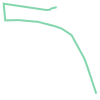

In [84]:
LineString(result2['sub_polyline'][0])

In [85]:
len([LineString(x) for x in result2['sub_polyline']])

51180

In [86]:
gdf_edges = gpd.GeoDataFrame({'geometry':[LineString(x) for x in result2['sub_polyline']],
                             'u_v':result2['osmid_zipped'],
                              'label':result2['label'],
                             },
                         crs='epsg:4326')

In [87]:
gdf_edges.head()

,geometry,u_v,label
0,"LINESTRING (121.39882 31.26387, 121.39873 31.2...","(0, 1)",地面公交
1,"LINESTRING (121.39950 31.26238, 121.39957 31.2...","(1, 2)",地面公交
2,"LINESTRING (121.40135 31.25666, 121.40145 31.2...","(2, 3)",地面公交
3,"LINESTRING (121.40504 31.25322, 121.40639 31.2...","(3, 4)",地面公交
4,"LINESTRING (121.41735 31.24136, 121.41786 31.2...","(4, 5)",地面公交


In [88]:
gdf_edges['u'] = gdf_edges['u_v'].str.get(0)
gdf_edges['v'] = gdf_edges['u_v'].str.get(1)
gdf_edges['key'] = 0

In [89]:
gdf_edges.head(1)

,geometry,u_v,label,u,v,key
0,"LINESTRING (121.39882 31.26387, 121.39873 31.2...","(0, 1)",地面公交,0,1,0


In [90]:
gdf_edges = gdf_edges.to_crs(epsg=32650)

In [91]:
gdf_edges['length'] = gdf_edges.length

In [92]:
gdf_edges.head()

,geometry,u_v,label,u,v,key,length
0,"LINESTRING (918968.497 3467202.556, 918960.018...","(0, 1)",地面公交,0,1,0,355.240859
1,"LINESTRING (919039.828 3467040.299, 919046.890...","(1, 2)",地面公交,1,2,0,660.524698
2,"LINESTRING (919241.923 3466412.289, 919252.389...","(2, 3)",地面公交,2,3,0,705.929566
3,"LINESTRING (919609.004 3466045.170, 919736.310...","(3, 4)",地面公交,3,4,0,2068.324104
4,"LINESTRING (920835.089 3464775.071, 920885.415...","(4, 5)",地面公交,4,5,0,977.285092


In [93]:
gdf_edges = gdf_edges.to_crs(epsg=4326)

In [94]:
gdf_edges

,geometry,u_v,label,u,v,key,length
0,"LINESTRING (121.39882 31.26387, 121.39873 31.2...","(0, 1)",地面公交,0,1,0,355.240859
1,"LINESTRING (121.39950 31.26238, 121.39957 31.2...","(1, 2)",地面公交,1,2,0,660.524698
2,"LINESTRING (121.40135 31.25666, 121.40145 31.2...","(2, 3)",地面公交,2,3,0,705.929566
3,"LINESTRING (121.40504 31.25322, 121.40639 31.2...","(3, 4)",地面公交,3,4,0,2068.324104
4,"LINESTRING (121.41735 31.24136, 121.41786 31.2...","(4, 5)",地面公交,4,5,0,977.285092
...,...,...,...,...,...,...,...
51179,"LINESTRING (121.52023 31.02745, 121.52126 31.0...","(53641, 53642)",轨道交通,53641,53642,0,1359.608278
51180,"LINESTRING (121.52779 31.03261, 121.52770 31.0...","(53642, 53643)",轨道交通,53642,53643,0,1185.939191
51181,"LINESTRING (121.52628 31.04320, 121.52624 31.0...","(53643, 53644)",轨道交通,53643,53644,0,773.828986
51182,"LINESTRING (121.52601 31.05016, 121.52601 31.0...","(53644, 53645)",轨道交通,53644,53645,0,1018.259321


In [95]:
gdf_edges = gdf_edges.set_index(['u','v','key'])

In [96]:
gdf_nodes.head(1)

,station_names,label,line_name,x,y,geometry
osmid,,,,,,
0,上海西站,地面公交,01路(上海西站--蓝村路南泉路),121.398821,31.263867,POINT (121.39882 31.26387)


In [97]:
gdf_edges.head(1)

,,,geometry,u_v,label,length
u,v,key,,,,
0,1,0,"LINESTRING (121.39882 31.26387, 121.39873 31.2...","(0, 1)",地面公交,355.240859


In [98]:
gdf_edges['wkt'] = gdf_edges['geometry'].apply(lambda x:x.wkt) # 存一个线路的wkt

In [99]:
gdf_edges.head(1)

,,,geometry,u_v,label,length,wkt
u,v,key,,,,,
0,1,0,"LINESTRING (121.39882 31.26387, 121.39873 31.2...","(0, 1)",地面公交,355.240859,LINESTRING (121.3988208531572 31.2638670382169...


In [100]:
gdf_edges.columns

Index(['geometry', 'u_v', 'label', 'length', 'wkt'], dtype='object')

In [101]:
gdf_edges = gdf_edges[['geometry', 'label', 'length','wkt']]

In [102]:
gdf_edges.to_file('./SHANGHAI/middleData/gdf_edges.geojson')

In [103]:
G = ox.graph_from_gdfs(gdf_nodes, gdf_edges)

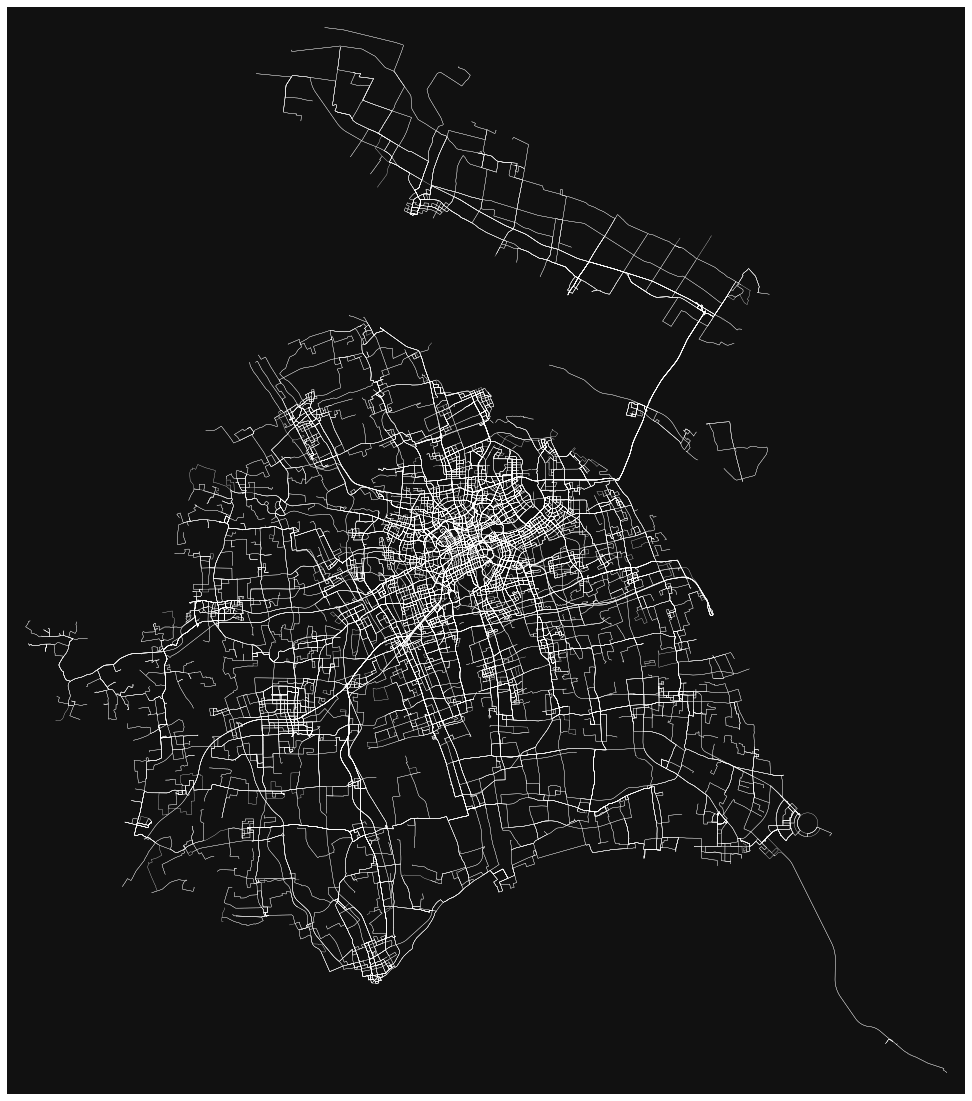

In [104]:
fig, ax = ox.plot_graph(G,figsize=(20,20),
                        node_color="white",
                        node_size=0,
                        edge_linewidth=0.3,
                        edge_color="w",
#                         bgcolor='none'
                        
             )

<AxesSubplot:>

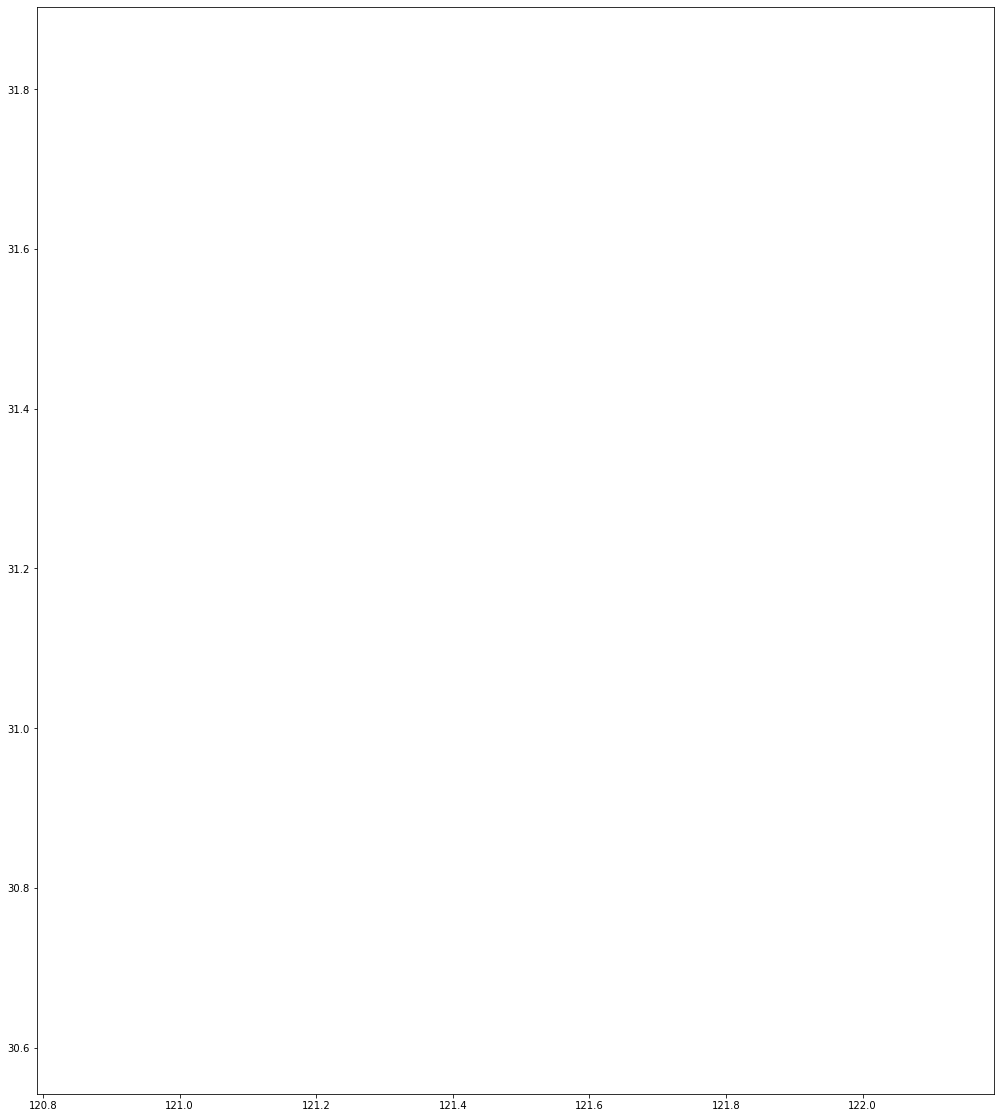

In [105]:
ax = gdf_edges.plot(figsize=(20,20),lw=1,color='white')
gdf_nodes.plot(ax=ax,color='white',markersize=3)
